# Burnout en empleados corporativos
## Aprendizaje de Máquina - TP FINAL

---
## Desarrollo del modelos de árboles
---

#### Carga de datos

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, RocCurveDisplay,
    classification_report
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [9]:
# Cargar de los datasets
X_train = pd.read_csv("output/burnout_X_train.csv")
y_train = pd.read_csv("output/burnout_y_train.csv")
X_test = pd.read_csv("output/burnout_X_test.csv")
y_test = pd.read_csv("output/burnout_y_test.csv")

In [10]:
#check unique values in y_train
print(y_train['BurnRate_Class'].unique())

[1. 0. 2.]


In [11]:
# 3. Escalado (opcional, para algunos modelos puede ayudar)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [12]:
# 4. Definir modelos de árboles a probar
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}



In [13]:
# Para guardar resultados y graficar después
cms = []
roc_data = []  # Listas de (fpr, tpr, auc, clase) por modelo

In [14]:
# Entrenar y guardar datos
for name, model in models.items():
    print(f'--- Modelo: {name} ---')
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cms.append((cm, model.classes_, name))
    
    # Curva ROC multiclase
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    n_classes = y_test_bin.shape[1]
    y_score = model.predict_proba(X_test_scaled)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    roc_data.append((fpr, tpr, roc_auc, model.classes_, name))

--- Modelo: Decision Tree ---
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      1136
         1.0       0.84      0.85      0.85      2514
         2.0       0.69      0.68      0.68       637

    accuracy                           0.82      4287
   macro avg       0.79      0.79      0.79      4287
weighted avg       0.82      0.82      0.82      4287

--- Modelo: Random Forest ---


/Users/martin/CEIA/MLI/CEIA-ML-TPFINAL/.venv/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      1136
         1.0       0.87      0.92      0.89      2514
         2.0       0.82      0.70      0.75       637

    accuracy                           0.87      4287
   macro avg       0.86      0.82      0.84      4287
weighted avg       0.87      0.87      0.87      4287

--- Modelo: Gradient Boosting ---


/Users/martin/CEIA/MLI/CEIA-ML-TPFINAL/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.91      0.84      0.88      1136
         1.0       0.86      0.93      0.90      2514
         2.0       0.84      0.70      0.76       637

    accuracy                           0.87      4287
   macro avg       0.87      0.82      0.85      4287
weighted avg       0.87      0.87      0.87      4287



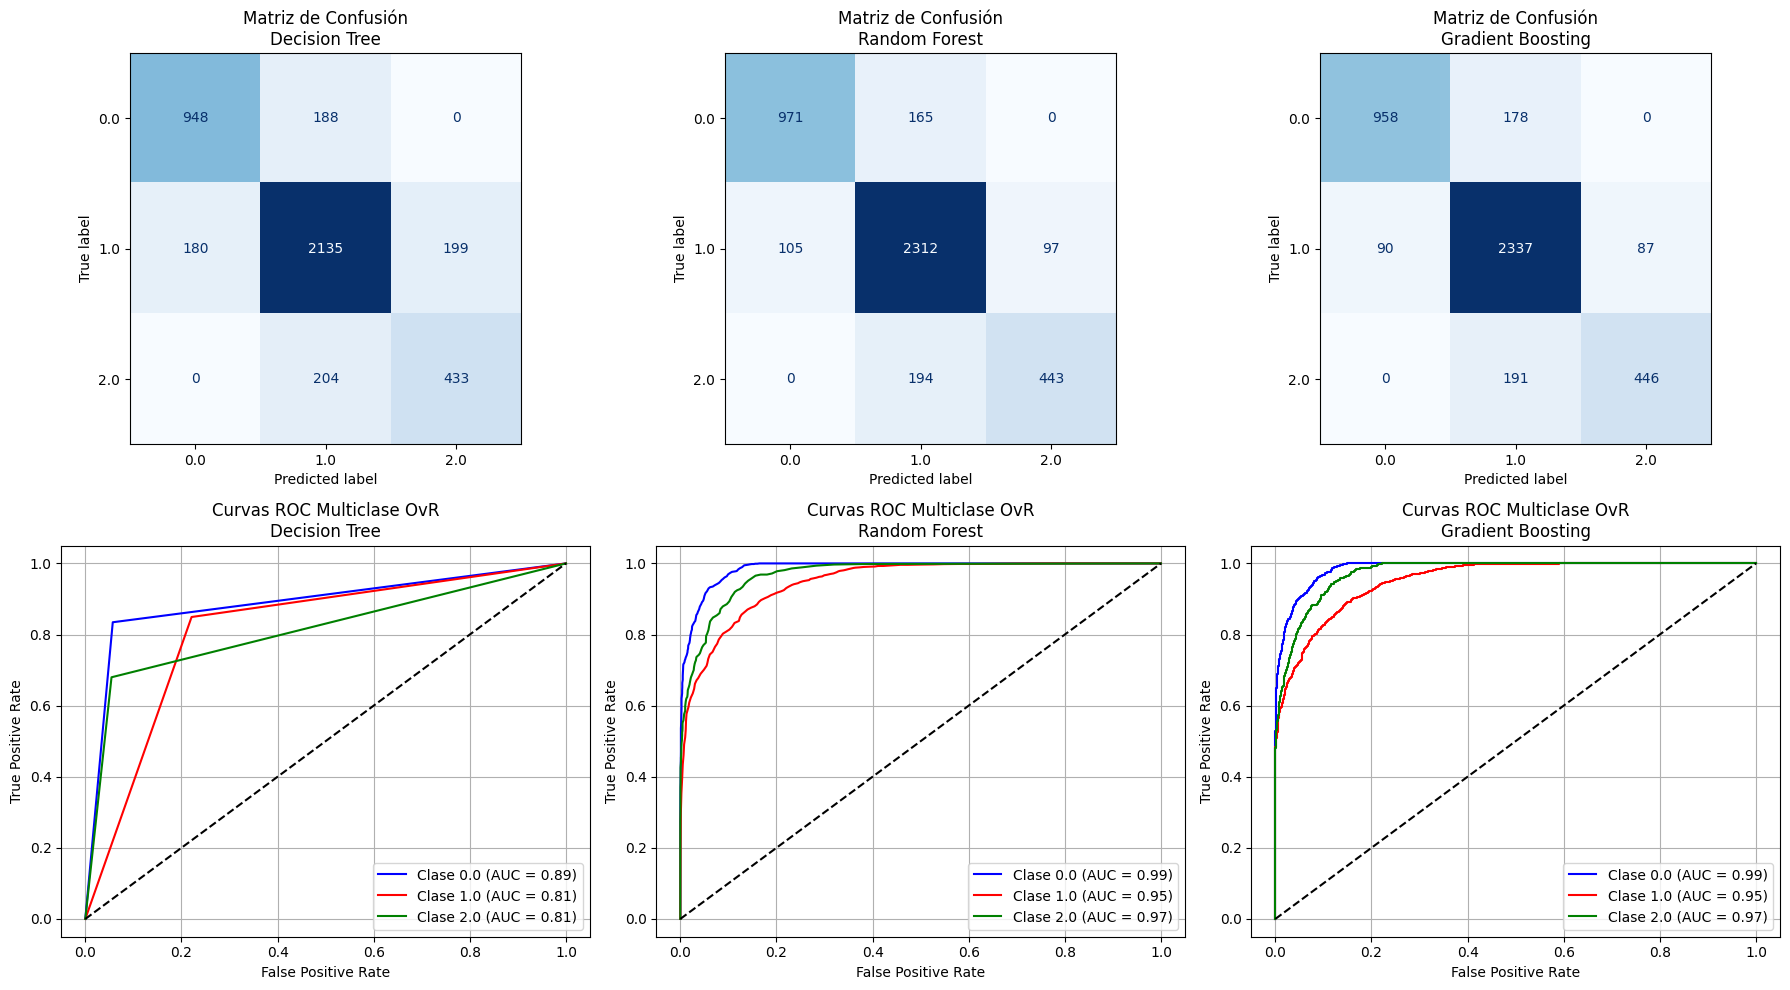

In [15]:
# Graficar todo junto
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Graficar matrices de confusión en la fila 1
for i, (cm, classes, name) in enumerate(cms):
    ax = axes[0, i]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(f'Matriz de Confusión\n{name}')
    ax.grid(False)

# Graficar curvas ROC en la fila 2
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, (fpr, tpr, roc_auc, classes, name) in enumerate(roc_data):
    ax = axes[1, i]
    for j, color in zip(range(len(classes)), colors):
        ax.plot(fpr[j], tpr[j], color=color,
                label=f'Clase {classes[j]} (AUC = {roc_auc[j]:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Curvas ROC Multiclase OvR\n{name}')
    ax.legend(loc='lower right')
    ax.grid(True)

plt.tight_layout()
plt.show()